In [1]:
import os
import torch
from torchsummary import summary
from torchviz import make_dot

from dataset import ARCADE
from model import UNetPlusPlus
from utils import (
    plot_image_with_mask
)

# Data

In [2]:
stenosis_train = ARCADE('dataset/stenosis/train')
# stenosis_test = ARCADE('dataset/stenosis/test')
# stenosis_val = ARCADE('dataset/stenosis/val')
# 
# syntax_train = ARCADE('dataset/syntax/train')
# syntax_test = ARCADE('dataset/syntax/test')
# syntax_val = ARCADE('dataset/syntax/val')

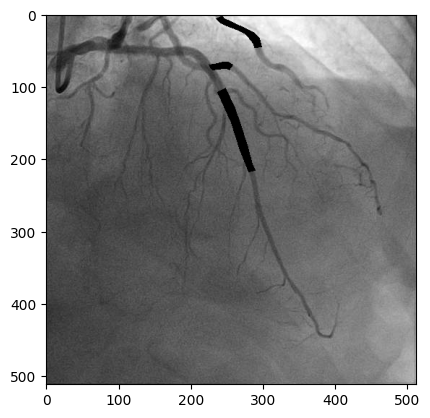

In [3]:
sample = stenosis_train[1]
image = sample['image']
mask = sample['mask']

plot_image_with_mask(image, mask)

In [4]:
image.shape

(512, 512)

In [5]:
mask.shape

(512, 512)

# Model

In [6]:
unet_features = [32, 64, 128, 256, 512]
wide_unet_features = [35, 70, 140, 280, 560]

In [7]:
model = UNetPlusPlus()
x = torch.randn(1, 1, 512, 512)
y = model(x)
summary(model, (1, 512, 512))

Layer (type:depth-idx)                   Output Shape              Param #
├─VGGBlock: 1-1                          [-1, 32, 512, 512]        --
|    └─Sequential: 2-1                   [-1, 32, 512, 512]        --
|    |    └─Conv2d: 3-1                  [-1, 32, 512, 512]        320
|    |    └─BatchNorm2d: 3-2             [-1, 32, 512, 512]        64
|    |    └─ReLU: 3-3                    [-1, 32, 512, 512]        --
|    |    └─Conv2d: 3-4                  [-1, 32, 512, 512]        9,248
|    |    └─BatchNorm2d: 3-5             [-1, 32, 512, 512]        64
|    |    └─ReLU: 3-6                    [-1, 32, 512, 512]        --
├─MaxPool2d: 1-2                         [-1, 32, 256, 256]        --
├─VGGBlock: 1-3                          [-1, 64, 256, 256]        --
|    └─Sequential: 2-2                   [-1, 64, 256, 256]        --
|    |    └─Conv2d: 3-7                  [-1, 64, 256, 256]        18,496
|    |    └─BatchNorm2d: 3-8             [-1, 64, 256, 256]        128
|    |

Layer (type:depth-idx)                   Output Shape              Param #
├─VGGBlock: 1-1                          [-1, 32, 512, 512]        --
|    └─Sequential: 2-1                   [-1, 32, 512, 512]        --
|    |    └─Conv2d: 3-1                  [-1, 32, 512, 512]        320
|    |    └─BatchNorm2d: 3-2             [-1, 32, 512, 512]        64
|    |    └─ReLU: 3-3                    [-1, 32, 512, 512]        --
|    |    └─Conv2d: 3-4                  [-1, 32, 512, 512]        9,248
|    |    └─BatchNorm2d: 3-5             [-1, 32, 512, 512]        64
|    |    └─ReLU: 3-6                    [-1, 32, 512, 512]        --
├─MaxPool2d: 1-2                         [-1, 32, 256, 256]        --
├─VGGBlock: 1-3                          [-1, 64, 256, 256]        --
|    └─Sequential: 2-2                   [-1, 64, 256, 256]        --
|    |    └─Conv2d: 3-7                  [-1, 64, 256, 256]        18,496
|    |    └─BatchNorm2d: 3-8             [-1, 64, 256, 256]        128
|    |

In [9]:
os.environ["PATH"] += os.pathsep + 'F:/Program Files/Graphviz/bin/'
make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

# Training